In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

Đọc, tiền xử lý dữ liệu

In [2]:
df= pd.read_csv('location_rev.csv')

In [3]:
df.describe()

,revenue,num_competitors,median_income,num_loyalty_members,population_density,location_age
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,38433.469330,3.397000,31360.668500,1597.200000,3351.199000,11.041000
std,11665.825242,1.016082,3943.278358,496.874663,975.664263,3.034885
min,5000.000000,0.000000,20000.000000,0.000000,0.000000,0.000000
25%,30277.897500,3.000000,28792.592500,1253.000000,2689.250000,9.000000
50%,38323.095000,3.000000,31134.555000,1605.000000,3353.000000,11.000000
75%,45894.670000,4.000000,34050.992500,1925.250000,4017.000000,13.000000
max,79342.070000,7.000000,43676.900000,3280.000000,6489.000000,24.000000


In [4]:
df.corr()

,revenue,num_competitors,median_income,num_loyalty_members,population_density,location_age
revenue,1.000000,-0.156685,0.601888,0.173432,0.311653,0.552773
num_competitors,-0.156685,1.000000,-0.018398,-0.027283,0.035768,0.053796
median_income,0.601888,-0.018398,1.000000,0.011891,-0.041697,0.045621
num_loyalty_members,0.173432,-0.027283,0.011891,1.000000,-0.028611,0.036016
population_density,0.311653,0.035768,-0.041697,-0.028611,1.000000,-0.009977
location_age,0.552773,0.053796,0.045621,0.036016,-0.009977,1.000000


<AxesSubplot: xlabel='median_income', ylabel='revenue'>

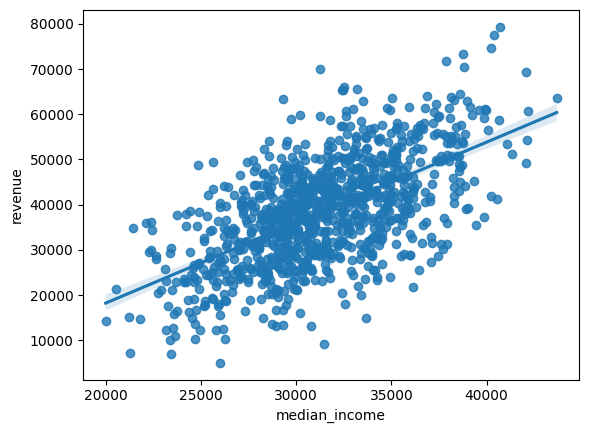

In [5]:
sns.regplot(data=df,x='median_income',y='revenue')

<AxesSubplot: xlabel='median_income', ylabel='revenue'>

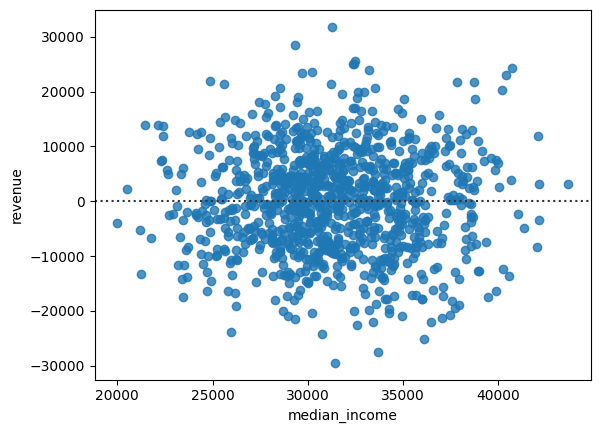

In [6]:
sns.residplot(data=df,x='median_income',y='revenue')

Chuẩn bị dữ liệu để training data/ test data

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
y1 = df['revenue']
X1 = df[['median_income']]

In [9]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1,random_state=42)

Linear Regression
Simple linear regression: Xây dựng và đánh giá

In [10]:
# Load module, tạo đối tượng linear regression

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
model = LinearRegression()
model.fit(X1_train,y1_train)

LinearRegression()

Intercept, slope

In [13]:
intercept = model.intercept_
slope = model.coef_[0]
print(intercept, slope)

-17944.393212607967 1.8044776691444901


In [14]:
y1_pred = model.predict(X1_test)

In [15]:
# Đánh giá model

In [16]:
# R^2 cho toàn bộ dữ liệu
model.score(X1,y1)

0.3618738533973396

In [17]:
# R^2 khi train
model.score(X1_train,y1_train)

0.37376263809946475

In [18]:
# R^2 khi test
model.score(X1_test,y1_test)

0.3246804918433005

In [19]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [20]:
mse = mean_squared_error(y1_pred,y1_test)
print(mse)

90952579.47704405


In [21]:
mae = mean_absolute_error(y1_pred,y1_test)
print(mae)

7751.936386800821


Underfitting

Đặt giới hạn trục x và y là 10.000 để chúng ta có được cái nhìn rõ hơn về vị trí của hầu hết các điểm dữ liệu.
Thêm line có độ dốc 1 đóng vai trò là tham chiếu. Nếu tất cả các điểm nằm trên line này, điều đó có nghĩa là có một mối quan hệ hoàn hảo giữa thực tế và dự đoán.

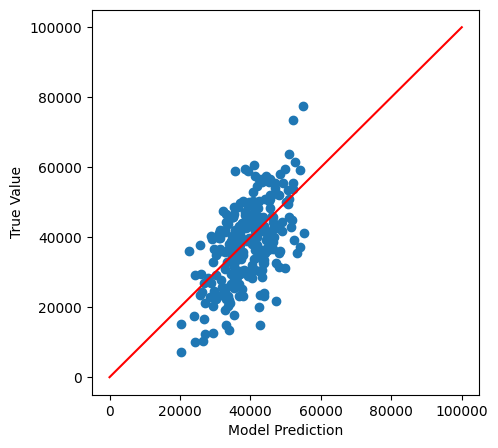

In [22]:
plt.figure(figsize=(5,5))
plt.scatter(model.predict(X1_test),y1_test)
plt.xlabel('Model Prediction')
plt.ylabel('True Value')
plt.plot([0,100000],[0,100000],'-',color = 'r')
plt.show()